In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('ds1.csv',sep=';')

In [3]:
X = df.drop(['ID','Label'], axis=1)

y = df['Label']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [5]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train.shape, X_test.shape

((61, 12), (16, 12))

In [8]:

from sklearn.ensemble import RandomForestClassifier
randomF = RandomForestClassifier(max_depth=5, n_estimators=100)

randomF.fit(X_train, y_train)

y_pred = randomF.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuray: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuray: 0.5625


In [9]:
randomF.score(X_test, y_test)

0.5625

In [10]:
y_predicted = randomF.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6, 2, 3],
       [2, 3, 0],
       [0, 0, 0]])

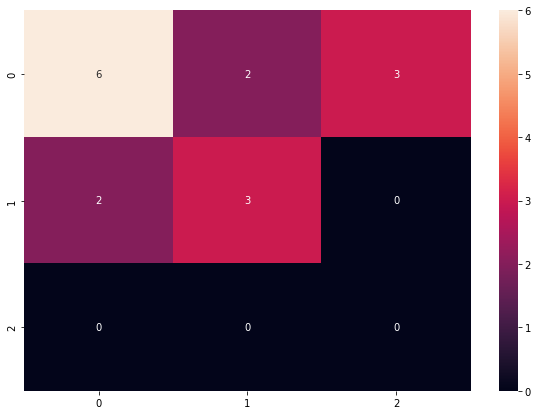

In [12]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot= True)
